In [106]:
# Producing single subject maps of seed-to-voxel correlation movie-watching fMRI scans.
# These maps depict the temporal correlation of a seed region with the rest of the brain.

In [1]:
from nilearn import datasets
dataset = datasets.fetch_development_fmri(n_subjects=1)
func_filename = dataset.func[0]
confound_filename = dataset.confounds[0]

In [2]:
print(func_filename)
print(confound_filename)

C:\Users\Utilisateur/nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
C:\Users\Utilisateur/nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_desc-reducedConfounds_regressors.tsv


In [3]:
# Time series extraction

In [4]:
opIFG_coords = [(-50, 8, 23)]
planumtemp_coords = [(-51, -42, 21)]
aMTG_coords = [(-60, -6 ,-18)]
pITG_coords = [(-54, -52, -10)]



In [5]:
# nilearn.maskers.NiftiSpheresMasker to extract the time series from the functional imaging within the sphere

In [6]:
from nilearn.maskers import NiftiSpheresMasker

In [7]:
seed_masker = NiftiSpheresMasker(
    opIFG_coords, radius=8, detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2,
    memory='nilearn_cache', memory_level=1, verbose=0)

In [8]:
print(seed_masker)

NiftiSpheresMasker(detrend=True, high_pass=0.01, low_pass=0.1,
                   memory='nilearn_cache', radius=8, seeds=[(-50, 8, 23)],
                   standardize=True, t_r=2)


In [9]:
# Then we extract the mean time series within the seed region while regressing out the confounds that can be found in the dataset’s csv file

In [10]:
seed_time_series = seed_masker.fit_transform(func_filename,
                                             confounds=[confound_filename])

In [11]:
from nilearn.maskers import NiftiMasker

brain_masker = NiftiMasker(
    smoothing_fwhm=6, detrend=True, standardize=True,
    low_pass=0.1, high_pass=0.01, t_r=2,
    memory='nilearn_cache', memory_level=1, verbose=0)

In [12]:
brain_time_series = brain_masker.fit_transform(func_filename,
                                               confounds=[confound_filename])

In [13]:
# the seed time series is an array with shape n_volumes, 1), while the brain time series is an array with shape (n_volumes, n_voxels

In [14]:
print("Seed time series shape: (%s, %s)" % seed_time_series.shape)
print("Brain time series shape: (%s, %s)" % brain_time_series.shape)

Seed time series shape: (168, 1)
Brain time series shape: (168, 32504)


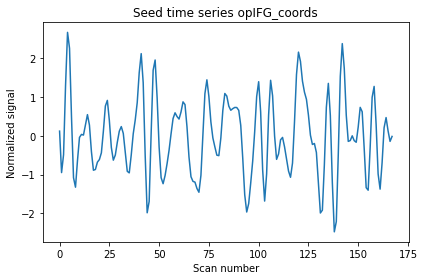

In [15]:
import matplotlib.pyplot as plt

plt.plot(seed_time_series)
plt.title('Seed time series opIFG_coords')
plt.xlabel('Scan number')
plt.ylabel('Normalized signal')
plt.tight_layout()

In [16]:
# Performing the seed-to-voxel correlation analysis

In [17]:
import numpy as np

seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series) /
                              seed_time_series.shape[0]
                              )

In [18]:
seed_to_voxel_correlations

array([[ 0.08093091],
       [ 0.11043076],
       [-0.00219343],
       ...,
       [ 0.13888691],
       [-0.07920757],
       [ 0.13821898]])

In [19]:
print("Seed-to-voxel correlation shape: (%s, %s)" %
      seed_to_voxel_correlations.shape)
print("Seed-to-voxel correlation: min = %.3f; max = %.3f" % (
    seed_to_voxel_correlations.min(), seed_to_voxel_correlations.max()))

Seed-to-voxel correlation shape: (32504, 1)
Seed-to-voxel correlation: min = -0.600; max = 0.864


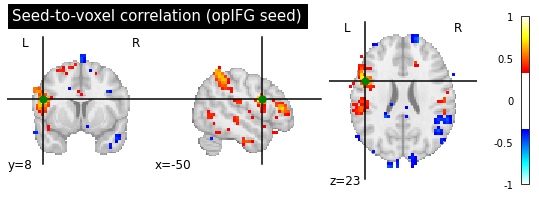

In [26]:
from nilearn import plotting

seed_to_voxel_correlations_img = brain_masker.inverse_transform(
    seed_to_voxel_correlations.T)
display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                 threshold=0.34, vmax=1,
                                 cut_coords=opIFG_coords[0],
                                 title="Seed-to-voxel correlation (opIFG seed)",
                                 )
display.add_markers(marker_coords=opIFG_coords, marker_color='g',
                    marker_size=50)

# we save the plot as pdf
# display.savefig('pcc_seed_correlation.pdf')
                    
